# CONTENT

1. IMPORTING THE LIBRARIES

2. READING THE DATA 

3. EXPLORATORY DATA ANALYSIS

4. MODEL SELECTION 
  
 4.1 RANDOM FOREST REGRESSOR
 
 4.2 LINEAR REGRESSOR
 
 4.3 POLYNOMIAL REGRESSOR
 
 4.4 RIDGE REGRESSOR
 
 4.5 LASSO REGRESSOR
 
 4.6 DECISSION TREE REGRESSOR 
 
 4.7 ADABOOST REGRESSOR
 
 4.8 GRADIENT BOOSTING REGRESSOR
 
 4.9 XGBOOST REGRESSOR
 
 4.10 LIGHT GRADIENT BOOSTING REGRESSOR

5. MODEL EVALUATION 

In [1]:
# Importing The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('cardata.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [4]:
## info() function is used to get a concise summary of the dataframe. 
## It comes really handy when doing exploratory analysis of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.shape

(301, 9)

In [6]:
## describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or 
## a series of numeric values.
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
len(data.Car_Name.unique())

98

In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Automatic Transmission Cars have high selling price


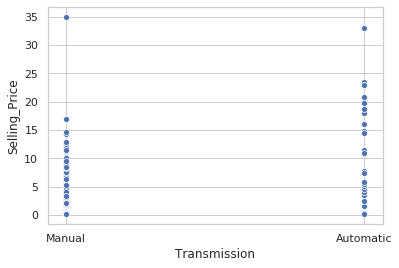

In [9]:
sns.set(style="whitegrid") 
sns.scatterplot(x='Transmission',y='Selling_Price', data=data)
print('Automatic Transmission Cars have high selling price')

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [11]:
## Here by using dtypes method we get the features whose are of object type
for column in data.columns:
    if data.dtypes[column] == np.object:
        data[column] = lb.fit_transform(data[column])

In [12]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [13]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
data.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


## Here we are importing datetime module to get current year

In [15]:
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2020, 7, 28, 11, 46, 4, 428905)

In [16]:
# Here we created a new feature to store current year
data['Current_Year'] = now.year
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,90,2014,3.35,5.59,27000,2,0,1,0,2020
1,93,2013,4.75,9.54,43000,1,0,1,0,2020
2,68,2017,7.25,9.85,6900,2,0,1,0,2020
3,96,2011,2.85,4.15,5200,2,0,1,0,2020
4,92,2014,4.60,6.87,42450,1,0,1,0,2020


In [17]:
# We are going to substract Current_Year and Year feature
# By this way we get information about how old the car is
data['NO_Of_Years'] = data['Current_Year'] - data['Year']

In [18]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,NO_Of_Years
0,90,2014,3.35,5.59,27000,2,0,1,0,2020,6
1,93,2013,4.75,9.54,43000,1,0,1,0,2020,7
2,68,2017,7.25,9.85,6900,2,0,1,0,2020,3
3,96,2011,2.85,4.15,5200,2,0,1,0,2020,9
4,92,2014,4.60,6.87,42450,1,0,1,0,2020,6


In [19]:
# Now we don't required the Current_Year and Year feature so we drop it
data.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [20]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Of_Years
0,90,3.35,5.59,27000,2,0,1,0,6
1,93,4.75,9.54,43000,1,0,1,0,7
2,68,7.25,9.85,6900,2,0,1,0,3
3,96,2.85,4.15,5200,2,0,1,0,9
4,92,4.60,6.87,42450,1,0,1,0,6


In [21]:
data.corr()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Of_Years
Car_Name,1.000000,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192,-0.017265
Selling_Price,0.499198,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.475539,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.064453,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.371446,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.829718,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.059855,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.081192,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
NO_Of_Years,-0.017265,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


Less Driven cars have high selling price


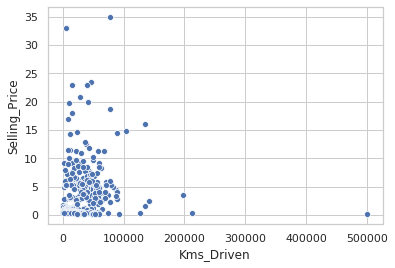

In [22]:
sns.set(style="whitegrid") 
sns.scatterplot(x='Kms_Driven',y='Selling_Price', data=data)
print('Less Driven cars have high selling price')

Latest Cars have high selling price


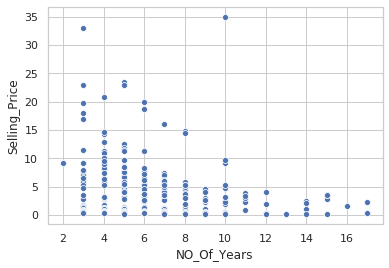

In [23]:
sns.set(style="whitegrid") 
sns.scatterplot(x='NO_Of_Years',y='Selling_Price', data=data)
print('Latest Cars have high selling price')

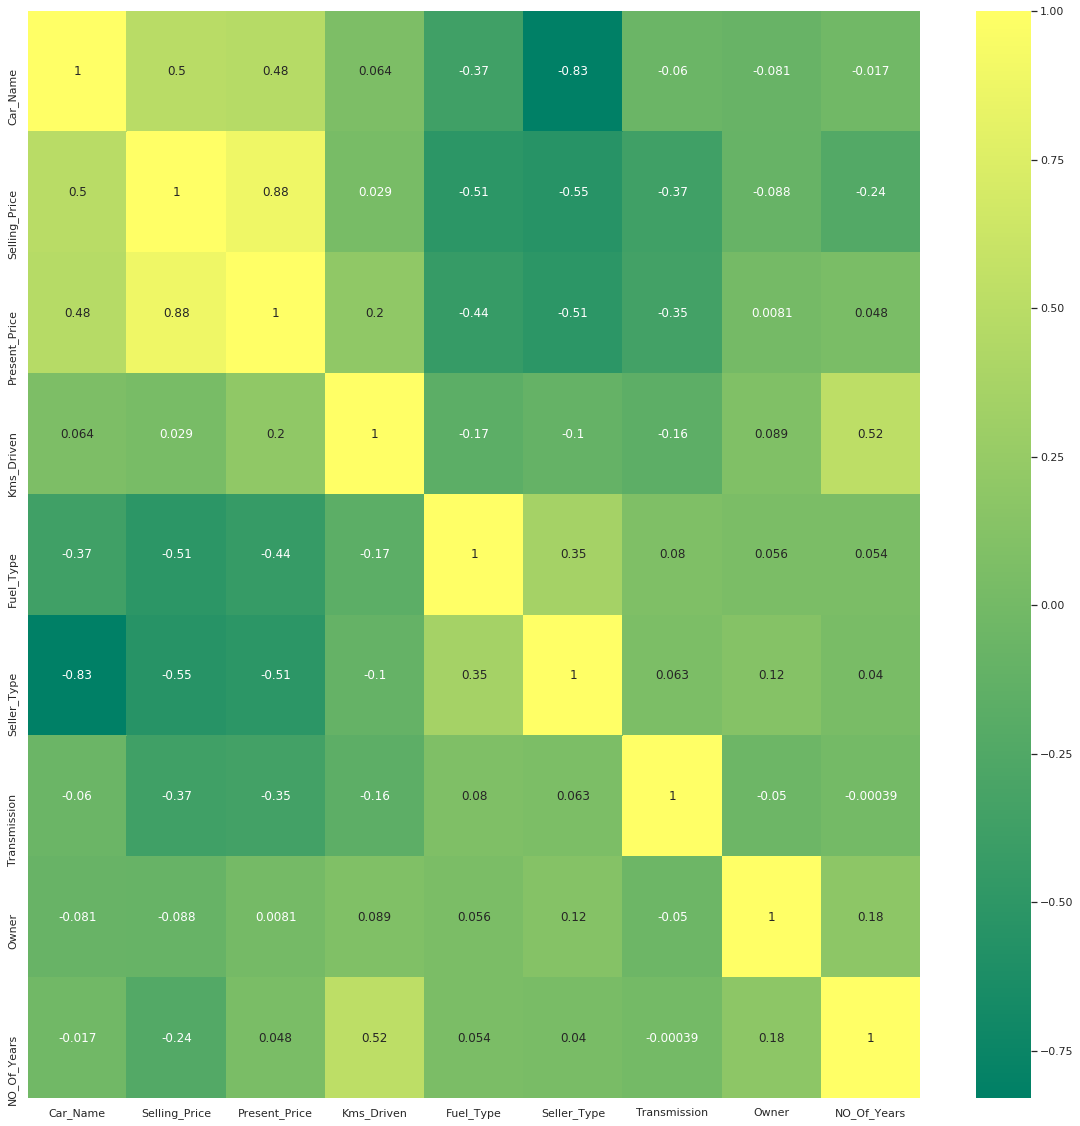

In [24]:
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20)) 
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="summer")

## Correlation Analysis:-
    1.Selling_Price is more correlated with Present_Price and Car_Name
    2.Seller_Type and Fuel_Type are highly negatively correlated to Selling_Price 

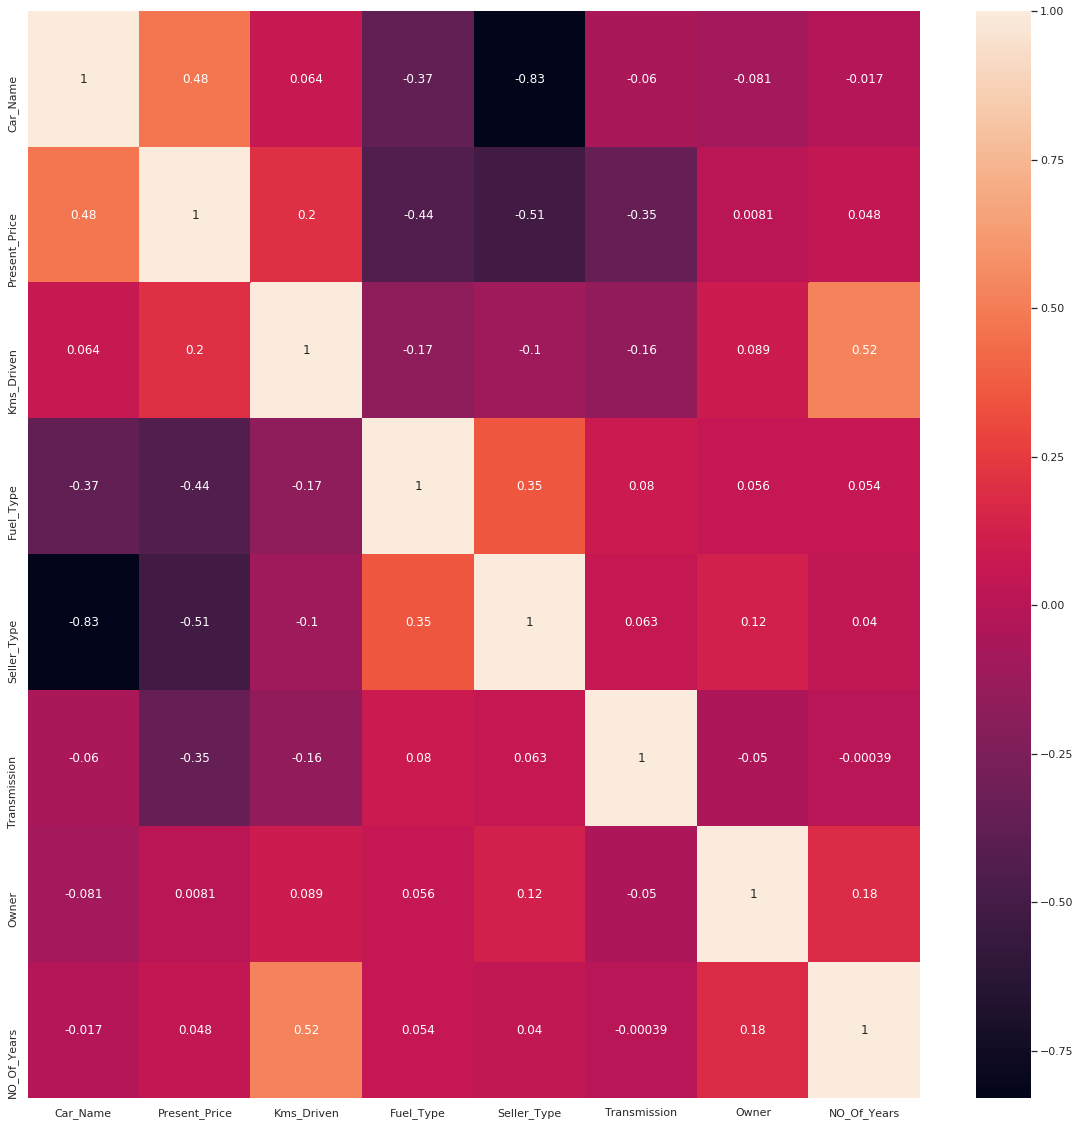

In [25]:
# Here we are seeing that is there are any features which are highly correlated with each other
# That's why here we are just dropping dependant feature (target feature)
corr = data.drop('Selling_Price',axis=1).corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(), annot=True)

## Correlation Analysis:-
    1.Car_Name and Seller_Type are highly negatively correlated to each other
    2.NO_Of_Years and Kms_Driven are highly correlated to each other

In [26]:
X = data.drop('Selling_Price', axis=1)
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NO_Of_Years
0,90,5.59,27000,2,0,1,0,6
1,93,9.54,43000,1,0,1,0,7
2,68,9.85,6900,2,0,1,0,3
3,96,4.15,5200,2,0,1,0,9
4,92,6.87,42450,1,0,1,0,6


In [27]:
Y = data.Selling_Price
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Selection

## Random Forest Regressor

# INTRODUCTION

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model_rf = RandomForestRegressor(n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_depth=12, random_state=42)
model_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [31]:
model_rf.score(X_test, Y_test)

0.9379096450546209

In [32]:
test_pred_rf = model_rf.predict(X_test)

In [33]:
r2_rf = r2_score(Y_test, test_pred_rf)
print('r2 score for model is', r2_rf)

r2 score for model is 0.9379096450546209


In [34]:
## Now we are going to calculate Mean Squared Error
## MSE is nothing but your loss function. It is used to compare different estimators by comparing the value of MSE of them.
## Or also called as variance, which gives you intuition of the best fit estimate.
## Lesser the MSE => smaller is the error => better the estimator.

In [35]:
mse_test_rf = mean_squared_error(Y_test, test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

In [36]:
# A larger MSE means that the data values are dispersed widely around its central moment (mean), and 
# A smaller MSE means otherwise and it is definitely the preferred and/or desired choice as it shows 
# that your data values are dispersed closely to its central moment (mean)

In [37]:
print(f'Mean Squared Error of Test Set : {mse_test_rf}')
print(f'Root Mean Square Error of Test Set : {rmse_test_rf}')

Mean Squared Error of Test Set : 1.4302876192391005
Root Mean Square Error of Test Set : 1.195946327909033


In [38]:
train_pred_rf = model_rf.predict(X_train)

In [39]:
mse_train_rf = mean_squared_error(Y_train, train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)

In [40]:
print(f'Mean Squared Error of Train Set : {mse_train_rf}')
print(f'Root Mean Square Error of Train Set : {rmse_train_rf}')

Mean Squared Error of Train Set : 2.0953993395402386
Root Mean Square Error of Train Set : 1.4475494255949393


## Linear Regression

# INTRODUCTION

Linear Regression is usually the first machine learning algorithm that every data scientist comes across.
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). 
So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. 
If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model_lr = LinearRegression().fit(X_train, Y_train)

In [43]:
model_lr.score(X_test, Y_test)

0.8465539666862961

In [44]:
test_pred_lr = model_lr.predict(X_test)

In [45]:
r2_lr = r2_score(Y_test, test_pred_lr)
print('r2 score for model is', r2_lr)

r2 score for model is 0.8465539666862961


In [46]:
mse_test_lr = mean_squared_error(Y_test, test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

In [47]:
print(f'Mean Squared Error of Test Set : {mse_test_lr}')
print(f'Root Mean Square Error of Test Set : {rmse_test_lr}')

Mean Squared Error of Test Set : 3.534719069701098
Root Mean Square Error of Test Set : 1.8800848570479733


In [48]:
train_pred_lr = model_lr.predict(X_train)

In [49]:
mse_train_lr = mean_squared_error(Y_train, train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

In [50]:
print(f'Mean Squared Error of Train Set : {mse_train_lr}')
print(f'Root Mean Square Error of Train Set : {rmse_train_lr}')

Mean Squared Error of Train Set : 3.065031529189959
Root Mean Square Error of Train Set : 1.7507231446433666


## Polynomial Regression

# INTRODUCTION
Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables.

In a curvilinear relationship, the value of the target variable changes in a non-uniform manner with respect to the predictor (s). 

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [53]:
poly.fit(X_poly, Y)
model_poly = LinearRegression()

In [54]:
model_poly.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
model_poly.score(X_poly, Y)

0.9056398714246305

In [57]:
r2_poly = model_poly.score(X_poly, Y)
print('r2 score for model is', r2_poly)

r2 score for model is 0.9056398714246305


In [60]:
test_pred_poly = model_poly.predict(X_poly)
mse_test_poly = mean_squared_error(Y, test_pred_poly)
rmse_test_poly = np.sqrt(mse_test_poly)

In [61]:
print(f'Mean Squared Error of Test Set : {mse_test_poly}')
print(f'Root Mean Square Error of Test Set : {rmse_test_poly}')

Mean Squared Error of Test Set : 2.42969242903917
Root Mean Square Error of Test Set : 1.5587470702584079


## Ridge Regression

# INTRODUCTION

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting

In [62]:
from sklearn.linear_model import Ridge

In [68]:
model_rd = Ridge(alpha=10, max_iter=1000,
    tol=0.001,
    solver='auto',
    random_state=42)
model_rd.fit(X_train, Y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [69]:
model_rd.score(X_test, Y_test)

0.8489427719483954

In [70]:
test_pred_rd = model_rd.predict(X_test)
mse_test_rd = mean_squared_error(Y_test, test_pred_rd)
rmse_test_rd = np.sqrt(mse_test_rd)

In [71]:
r2_rd = r2_score(Y_test, test_pred_rd)
print('r2 score for model is', r2_rd)

r2 score for model is 0.8489427719483955


In [72]:
print(f'Mean Squared Error of Test Set : {mse_test_rd}')
print(f'Root Mean Square Error of Test Set : {rmse_test_rd}')

Mean Squared Error of Test Set : 3.479691544183493
Root Mean Square Error of Test Set : 1.8653931339488448


In [73]:
train_pred_rd = model_rd.predict(X_train)
mse_train_rd = mean_squared_error(Y_train, train_pred_rd)
rmse_train_rd = np.sqrt(mse_train_rd)

In [74]:
print(f'Mean Squared Error of Train Set : {mse_train_rd}')
print(f'Root Mean Square Error of Train Set : {rmse_train_rd}')

Mean Squared Error of Train Set : 3.128038484972855
Root Mean Square Error of Train Set : 1.7686261574942441


## Lasso Regression

# INTRODUCTION

It is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).
Lasso stands for Least Absolute Shrinkage and Selection Operator. Let us have a look at what Lasso regression means mathematically:

Residual Sum of Squares + λ * (Sum of the absolute value of the magnitude of coefficients)
Where,

    λ denotes the amount of shrinkage
    λ = 0 implies all features are considered and it is equivalent to the linear regression where only the residual sum of squares are considered to build a predictive model
    λ = ∞ implies no feature is considered i.e, as λ closes to infinity it eliminates more and more features
    The bias increases with increase in λ
    variance increases with decrease in λ
In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.

In [75]:
from sklearn.linear_model import Lasso

In [76]:
model_las = Lasso(alpha=1, max_iter=1200, 
                  random_state=42).fit(X_train, Y_train)

In [77]:
model_las.score(X_test, Y_test)

0.8036229278022061

In [78]:
test_pred_las = model_las.predict(X_test)
mse_test_las = mean_squared_error(Y_test, test_pred_las)
rmse_test_las = np.sqrt(mse_test_las)

In [79]:
r2_las = r2_score(Y_test, test_pred_las)
print('r2 score for model is', r2_las)

r2 score for model is 0.803622927802206


In [80]:
print(f'Mean Squared Error of Test Set : {mse_test_las}')
print(f'Root Mean Square Error of Test Set : {rmse_test_las}')

Mean Squared Error of Test Set : 4.523660644459423
Root Mean Square Error of Test Set : 2.1268898994681


In [81]:
train_pred_las = model_las.predict(X_train)
mse_train_las = mean_squared_error(Y_train, train_pred_las)
rmse_train_las = np.sqrt(mse_train_las)

In [82]:
print(f'Mean Squared Error of Train Set : {mse_train_las}')
print(f'Root Mean Square Error of Train Set : {rmse_train_las}')

Mean Squared Error of Train Set : 3.857839247902051
Root Mean Square Error of Train Set : 1.964138296531599


## Decision Tree Regressor

# INTRODUCTION

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
model_dc = DecisionTreeRegressor(min_samples_split=15, min_samples_leaf=2, max_depth=8, random_state=42, max_features='auto')
model_dc.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [85]:
model_dc.score(X_test, Y_test)

0.9656013542924112

In [86]:
test_pred_dc = model_dc.predict(X_test)
mse_test_dc = mean_squared_error(Y_test, test_pred_dc)
rmse_test_dc = np.sqrt(mse_test_dc)

In [87]:
r2_dc = r2_score(Y_test, test_pred_dc)
print('r2 score for model is', r2_dc)

r2 score for model is 0.9656013542924112


In [88]:
print(f'Mean Squared Error of Test Set : {mse_test_dc}')
print(f'Root Mean Square Error of Test Set : {rmse_test_dc}')

Mean Squared Error of Test Set : 0.7923929105806802
Root Mean Square Error of Test Set : 0.8901645412959787


In [89]:
train_pred_dc = model_dc.predict(X_train)
mse_train_dc = mean_squared_error(Y_train, train_pred_dc)
rmse_train_dc = np.sqrt(mse_train_dc)

In [90]:
print(f'Mean Squared Error of Train Set : {mse_train_dc}')
print(f'Root Mean Square Error of Train Set : {rmse_train_dc}')

Mean Squared Error of Train Set : 2.4109737241959426
Root Mean Square Error of Train Set : 1.5527310534010526


## AdaBoost Regressor

# INTRODUCTION

AdaBoost is the first stepping stone in the world of Boosting.
AdaBoost is one of the first boosting algorithms to be adapted in solving practices. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”.
The weak learners in AdaBoost are decision trees with a single split, called decision stumps.
AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.
AdaBoost algorithms can be used for both classification and regression problem.

In [91]:
from sklearn.ensemble import AdaBoostRegressor

In [92]:
model_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=16), n_estimators=900, learning_rate=1.0)
model_ada.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=16,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

In [93]:
model_ada.score(X_test, Y_test)

0.9583939503993506

In [94]:
test_pred_ada = model_ada.predict(X_test)
mse_test_ada = mean_squared_error(Y_test, test_pred_ada)
rmse_test_ada = np.sqrt(mse_test_ada)

In [95]:
r2_ada = r2_score(Y_test, test_pred_ada)
print('r2 score for model is', r2_ada)

r2 score for model is 0.9583939503993506


In [96]:
print(f'Mean Squared Error of Test Set : {mse_test_ada}')
print(f'Root Mean Square Error of Test Set : {rmse_test_ada}')

Mean Squared Error of Test Set : 0.9584196721311479
Root Mean Square Error of Test Set : 0.9789891072586803


In [97]:
train_pred_ada = model_ada.predict(X_train)
mse_train_ada = mean_squared_error(Y_train, train_pred_ada)
rmse_train_ada = np.sqrt(mse_train_ada)

In [98]:
print(f'Mean Squared Error of Train Set : {mse_train_ada}')
print(f'Root Mean Square Error of Train Set : {rmse_train_ada}')

Mean Squared Error of Train Set : 0.010382083333333337
Root Mean Square Error of Train Set : 0.10189250872038305


## Gradient Boosting Regressor

# INTRODUCTION

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
model_gb = GradientBoostingRegressor(min_samples_split=12, max_features='auto', min_samples_leaf=2, max_depth=8, random_state=42, n_estimators=1200, learning_rate=0.1)
model_gb.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=12,
                          min_weight_fraction_leaf=0.0, n_estimators=1200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
model_gb.score(X_test, Y_test)

0.9705795523853381

In [102]:
test_pred_gb = model_gb.predict(X_test)
mse_test_gb = mean_squared_error(Y_test, test_pred_gb)
rmse_test_gb = np.sqrt(mse_test_gb)

In [103]:
r2_gb = r2_score(Y_test, test_pred_gb)
print('r2 score for model is', r2_gb)

r2 score for model is 0.9705795523853381


In [104]:
print(f'Mean Squared Error of Test Set : {mse_test_gb}')
print(f'Root Mean Square Error of Test Set : {rmse_test_gb}')

Mean Squared Error of Test Set : 0.6777172076523144
Root Mean Square Error of Test Set : 0.8232358153362342


In [105]:
train_pred_gb = model_gb.predict(X_train)
mse_train_gb = mean_squared_error(Y_train, train_pred_gb)
rmse_train_gb = np.sqrt(mse_train_gb)

In [106]:
print(f'Mean Squared Error of Train Set : {mse_train_gb}')
print(f'Root Mean Square Error of Train Set : {rmse_train_gb}')

Mean Squared Error of Train Set : 9.949462041593254e-08
Root Mean Square Error of Train Set : 0.00031542767858248037


## XGBoost Regressor

# INTRODUCTION

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data

In [107]:
import xgboost as xgb

In [108]:
model_xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 1, max_depth = 18, alpha = 16, subsample=1, 
                             n_estimators = 1600, n_jobs=-1, gamma=3, colsample_bylevel=0.6, reg_lambda=1)

In [109]:
model_xgb.fit(X_train, Y_train)

[11:51:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1593723605503/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=16, base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.6, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=18,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1600, n_jobs=-1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=16, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [110]:
model_xgb.score(X_test, Y_test)

0.8638798553392377

In [111]:
test_pred_xgb = model_xgb.predict(X_test)
mse_test_xgb = mean_squared_error(Y_test, test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

In [112]:
r2_xgb = r2_score(Y_test, test_pred_xgb)
print('r2 score for model is', r2_xgb)

r2 score for model is 0.8638798553392377


In [113]:
print(f'Mean Squared Error of Test Set : {mse_test_xgb}')
print(f'Root Mean Square Error of Test Set : {rmse_test_xgb}')

Mean Squared Error of Test Set : 3.1356070972471235
Root Mean Square Error of Test Set : 1.7707645516124169


In [114]:
train_pred_xgb = model_xgb.predict(X_train)
mse_train_xgb = mean_squared_error(Y_train, train_pred_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)

In [115]:
print(f'Mean Squared Error of Train Set : {mse_train_xgb}')
print(f'Root Mean Square Error of Train Set : {rmse_train_xgb}')

Mean Squared Error of Train Set : 1.8702650757292443
Root Mean Square Error of Train Set : 1.3675763509688388


# Light Gradient Boosting Regressor

# INTRODUCTION

Light gradient boosting is one of the most efficient and fast algorithm.
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm.
Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms 
split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, 
the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much 
better accuracy which can rarely be achieved by any of the existing boosting algorithms

In [116]:
import lightgbm as lgb

In [117]:
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1000, learning_rate=1, 
                              n_estimators=900, max_depth=3, metric='rmse')

In [118]:
model_lgb.fit(X_train, Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=1, max_depth=3,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=900, n_jobs=-1, num_leaves=1000,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [119]:
model_lgb.score(X_test, Y_test)

0.9352282599868862

In [120]:
test_pred_lgb = model_lgb.predict(X_test)
mse_test_lgb = mean_squared_error(Y_test, test_pred_lgb)
rmse_test_lgb = np.sqrt(mse_test_lgb)

In [121]:
r2_lgb = r2_score(Y_test, test_pred_lgb)
print('r2 score for model is', r2_lgb)

r2 score for model is 0.9352282599868863


In [122]:
print(f'Mean Squared Error of Test Set : {mse_test_lgb}')
print(f'Root Mean Square Error of Test Set : {rmse_test_lgb}')

Mean Squared Error of Test Set : 1.4920548915983458
Root Mean Square Error of Test Set : 1.2214969879612254


In [123]:
train_pred_lgb = model_lgb.predict(X_train)
mse_train_lgb = mean_squared_error(Y_train, train_pred_lgb)
rmse_train_lgb = np.sqrt(mse_train_lgb)

In [124]:
print(f'Mean Squared Error of Train Set : {mse_train_lgb}')
print(f'Root Mean Square Error of Train Set : {rmse_train_lgb}')

Mean Squared Error of Train Set : 0.0010564589462308239
Root Mean Square Error of Train Set : 0.032503214398437945


In [125]:
models = pd.DataFrame({
    "Model": ['Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost Classifier', 'Linear Regression', 'Light Gradient Boosting', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression'],
    'Accuracy': [r2_dc, r2_rf, r2_ada, r2_gb, r2_xgb, r2_lr, r2_lgb, r2_poly, r2_las, r2_rd],
    'Mean Square Error Of Test Set': [mse_test_dc, mse_test_rf, mse_test_ada, mse_test_gb, mse_test_xgb, mse_test_lr, mse_test_lgb, mse_test_poly, mse_test_las, mse_test_rd],
    'Mean Square Error Of Train Set': [mse_train_dc, mse_train_rf, mse_train_ada, mse_train_gb, mse_train_xgb, mse_train_lr, mse_train_lgb, 0, mse_train_las, mse_train_rd],
    'Root Mean Square Error Of Test Set': [rmse_test_dc, rmse_test_rf, rmse_test_ada, rmse_test_gb, rmse_test_xgb, rmse_test_lr, rmse_test_lgb, rmse_test_poly, rmse_test_las, rmse_test_rd],
    'Root Mean Square Error Of Train Set': [rmse_train_dc, rmse_train_rf, rmse_train_ada, rmse_train_gb, rmse_train_xgb, rmse_train_lr, rmse_train_lgb, 0, rmse_train_las, rmse_train_rd]
})

In [126]:
models

,Model,Accuracy,Mean Square Error Of Test Set,Mean Square Error Of Train Set,Root Mean Square Error Of Test Set,Root Mean Square Error Of Train Set
0,Decision Tree,0.965601,0.792393,2.410974e+00,0.890165,1.552731
1,Random Forest,0.937910,1.430288,2.095399e+00,1.195946,1.447549
2,Ada Boost,0.958394,0.958420,1.038208e-02,0.978989,0.101893
3,Gradient Boosting,0.970580,0.677717,9.949462e-08,0.823236,0.000315
4,XGBoost Classifier,0.863880,3.135607,1.870265e+00,1.770765,1.367576
5,Linear Regression,0.846554,3.534719,3.065032e+00,1.880085,1.750723
6,Light Gradient Boosting,0.935228,1.492055,1.056459e-03,1.221497,0.032503
7,Polynomial Regression,0.905640,2.429692,0.000000e+00,1.558747,0.000000
8,Lasso Regression,0.803623,4.523661,3.857839e+00,2.126890,1.964138
9,Ridge Regression,0.848943,3.479692,3.128038e+00,1.865393,1.768626


In [127]:
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Mean Square Error Of Test Set,Mean Square Error Of Train Set,Root Mean Square Error Of Test Set,Root Mean Square Error Of Train Set
3,Gradient Boosting,0.970580,0.677717,9.949462e-08,0.823236,0.000315
0,Decision Tree,0.965601,0.792393,2.410974e+00,0.890165,1.552731
2,Ada Boost,0.958394,0.958420,1.038208e-02,0.978989,0.101893
1,Random Forest,0.937910,1.430288,2.095399e+00,1.195946,1.447549
6,Light Gradient Boosting,0.935228,1.492055,1.056459e-03,1.221497,0.032503
7,Polynomial Regression,0.905640,2.429692,0.000000e+00,1.558747,0.000000
4,XGBoost Classifier,0.863880,3.135607,1.870265e+00,1.770765,1.367576
9,Ridge Regression,0.848943,3.479692,3.128038e+00,1.865393,1.768626
5,Linear Regression,0.846554,3.534719,3.065032e+00,1.880085,1.750723
8,Lasso Regression,0.803623,4.523661,3.857839e+00,2.126890,1.964138
